In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import yfinance as yf
import mplfinance as mpf
from pandas_datareader import data as pdr

In [2]:
# import stocks in different industries

tickers = ['NVDA', 'PG', 'JPM', 'QAT']
start_date = '2014-01-01'
end_date = '2024-08-08'

df = yf.download(tickers, start = start_date, end = end_date)

[*********************100%%**********************]  4 of 4 completed


In [3]:
adj_close = df['Adj Close']
adj_close = adj_close.ffill()

In [4]:
# stock historical data

fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x=adj_close.index, y=adj_close[ticker], mode='lines', name=ticker))

fig.update_layout(
    title='Stocks Adjusted Closing Price',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Tickers',
    template='plotly_white',
    width=1200,
    height=800
)

fig.show()

### Economic Indicators

In [5]:
cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date).ffill()
unemployment_rate = pdr.get_data_fred('UNRATE', start = start_date, end = end_date).ffill()
gdp = pdr.get_data_fred('GDP', start = start_date, end = end_date).ffill()

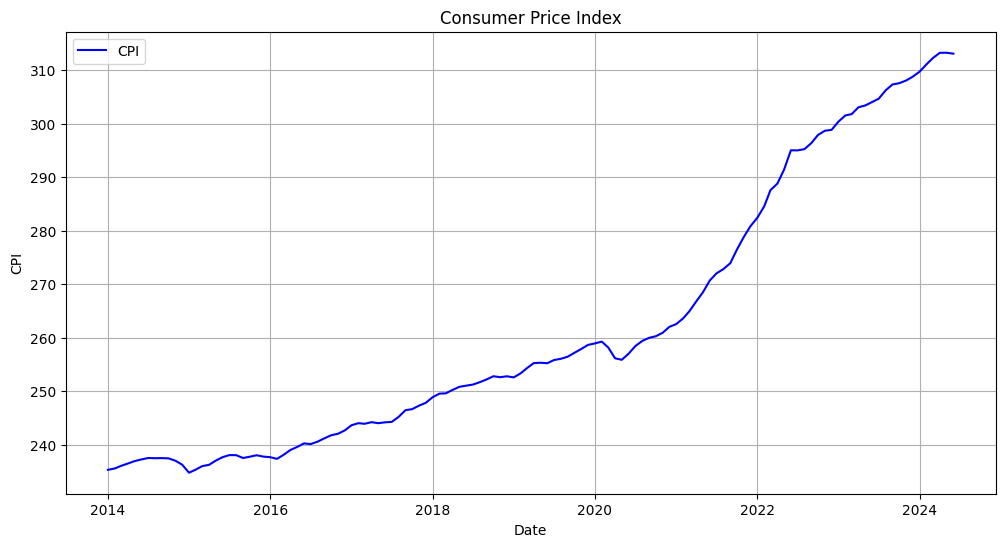

In [6]:
plt.figure(figsize = (12,6))
plt.plot(cpi, label = 'CPI', color = 'blue')
plt.title('Consumer Price Index')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid()

C:\Users\berna\AppData\Local\Temp\ipykernel_10980\3688686245.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



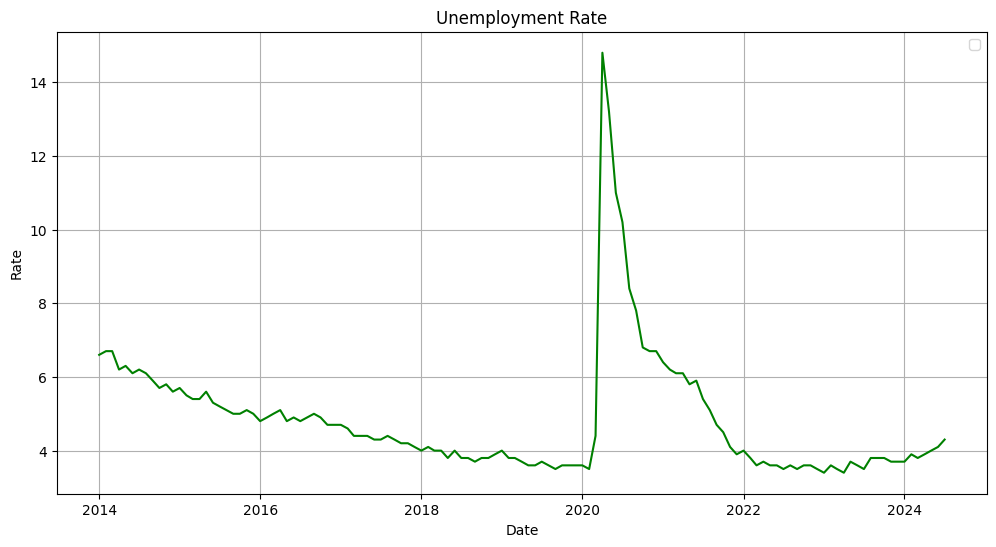

In [7]:
plt.figure(figsize = (12,6))
plt.plot(unemployment_rate, color = 'green')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid()

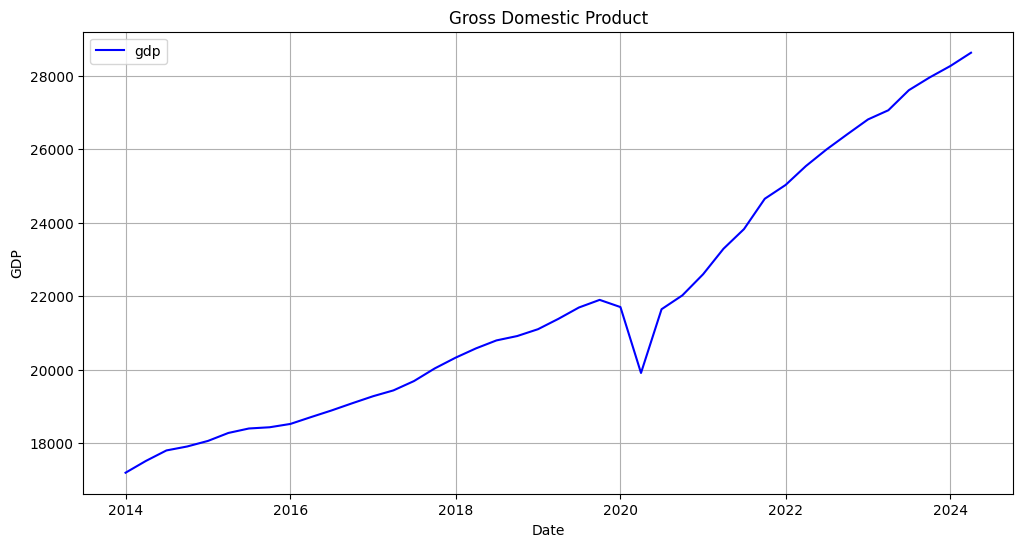

In [8]:
plt.figure(figsize = (12,6))
plt.plot(gdp, label = 'gdp', color = 'blue')
plt.title('Gross Domestic Product')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid()

<Axes: title={'center': 'Stocks & Economic Indicators Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

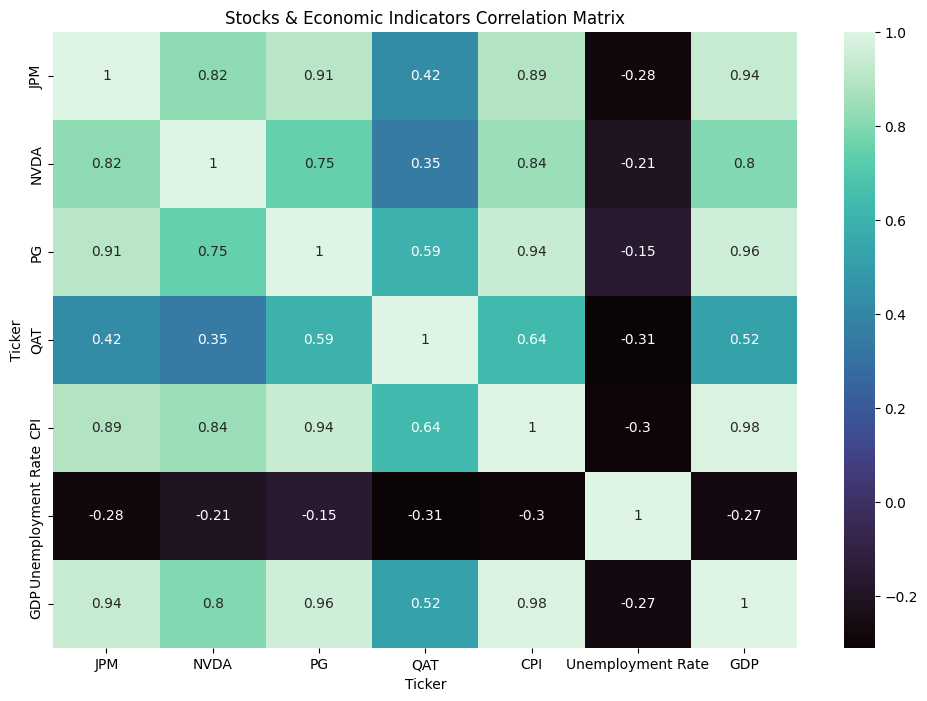

In [9]:
# correlation matrix with economic indicators

merged_df = adj_close.copy()
merged_df['CPI'] = cpi['CPIAUCSL']
merged_df['Unemployment Rate'] = unemployment_rate['UNRATE']
merged_df['GDP'] = gdp['GDP']

corr_matrix = merged_df.corr()

plt.figure(figsize = (12,8))
plt.title('Stocks & Economic Indicators Correlation Matrix')
sns.heatmap(corr_matrix, annot = True, cmap = 'mako')

### Analysis
1. JPM & PG has a strong correlation, if JPM stock goes up PG follows

2. QAT has lowest correlation among stocks, it does not run/follow with other stocks; operates on its own

3. Also QAT is severely affected by Unemployment rate, which as correlation of -0.31; which the highest among other stocks. If UR goes up QAR stock goes down

4. CPI & GDP has strong correlation among stocks, when it goes up stocks also follows